In [45]:
# Assignment 2 Python Code by Mimi Trinh
RANDOM_SEED = 1
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os

In [46]:
bank = pd.read_csv('bank.csv', sep = ';')  
print(bank.shape)
# there are 4521 rows / observations and 17 columns / variables in the dataset

(4521, 17)


In [47]:
bank.info()
# there's no missing value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
response     4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [48]:
bank.dropna()
print(bank.shape)
# confirm there's no missing value in dataset b/c have the same # of rows after using dropna()

(4521, 17)


In [49]:
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [50]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [51]:
pd.value_counts(bank['response'])
# only 11.5% observations belong to positive class (yes response)

no     4000
yes     521
Name: response, dtype: int64

In [52]:
pd.value_counts(bank['default'])

no     4445
yes      76
Name: default, dtype: int64

In [53]:
pd.value_counts(bank['housing'])

yes    2559
no     1962
Name: housing, dtype: int64

In [54]:
pd.value_counts(bank['loan'])

no     3830
yes     691
Name: loan, dtype: int64

Text(0.5,1,'Response Class Proportion')

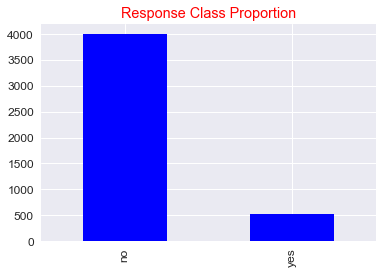

In [55]:
bank['response'].value_counts().plot(kind='bar',color='blue')
plt.title('Response Class Proportion',color='red')

Text(0.5,1,'Default Class Proportion')

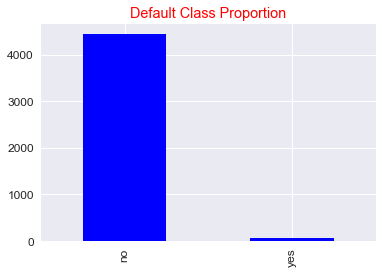

In [56]:
bank['default'].value_counts().plot(kind='bar',color='blue')
plt.title('Default Class Proportion',color='red')

Text(0.5,1,'Housing Class Proportion')

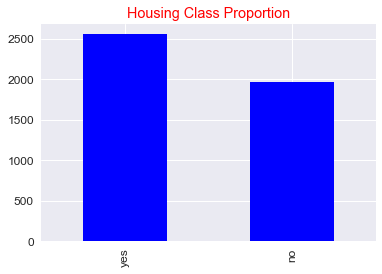

In [57]:
bank['housing'].value_counts().plot(kind='bar',color='blue')
plt.title('Housing Class Proportion',color='red')

Text(0.5,1,'Loan Class Proportion')

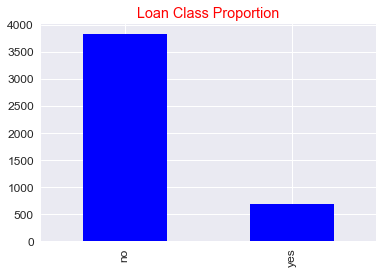

In [58]:
bank['loan'].value_counts().plot(kind='bar',color='blue')
plt.title('Loan Class Proportion',color='red')

In [59]:
# except housing, all three variables (response, default, loan) have unequal proportion of class (yes/no)
# this may cause issues later on when running logistic regression and naive bayes model

In [60]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}
# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)
# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)
# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)
# define response variable to use in the model
response = bank['response'].map(convert_to_binary)
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
# need to convert bank dataframe to model_data array to run logistic regression
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T
# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)
# model data now only have 4 columns but still have all rows

(4521, 4)


In [61]:
model_data

array([[0, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0]])

In [62]:
# predictor variables: default, housing, loan
x=model_data[:,:3]
x

array([[0, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1]])

In [63]:
# dependent variable: response
y=model_data[:,3]
y

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
pd.value_counts(model_data[:,3])

0    4000
1     521
dtype: int64

In [65]:
# classification model #1: logistic regression
logit=LogisticRegression()
logit.fit(x,y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
# quick assessment of model performance
logit.score(x,y)
# the model correctly classifies 88% of all observations 

0.8847600088476001

In [67]:
# predict() will give only output of 0 or 1
# predict_proba() will give probability of 1
# ie: model.predict_proba(test)[:,1] here 1 means to predict 1. If change to 0, model will give probability of 0
# can't use predict_proba() with confusion_matrix()

In [68]:
# confusion matrix
confusion_matrix(y,logit.predict(x))
# each row respresnts actual class, each column represents predicted class
# first row includes negative class or no response 
# true negative 4000 means 4000 observations are correctly classified as no response (actual = predict = no)
# false positive 0 means 0 observation is incorrectly classfied as yes response (actual = no, predict = yes)
# false negative 521 means that 521 observations are incorrectly classified as no response (actual = yes, predict = no)
# true positive 0 means that 0 observation is correctly classified as yes response (actual = predict = yes)
# confusion matrix shows 100% correct classification for class 0 (no) and 100% error for class 1 (yes)
# b/c response column is highly imbalanced with only 11.5% belong to positive class 1 (yes)

array([[4000,    0],
       [ 521,    0]])

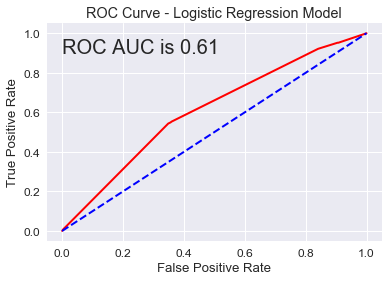

In [69]:
# draw ROC curve
fpr, tpr, thresholds = roc_curve(y,logit.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.text(0,0.9,'\nROC AUC is '+str(round(roc_auc_score(y,logit.predict_proba(x)[:,1]),2)),fontsize=20)
plt.show()

In [70]:
# calculate AUC of ROC curve using the following formula
roc_auc_score(y,logit.predict_proba(x)[:,1])

0.6086717850287908

In [71]:
# calculate AUC of ROC using cross validation design
scores1 = cross_val_score(logit, x, y, cv=10, scoring='roc_auc')
print(scores1)
# the result now is not as great as the 88% logit score metric earlier anymore b/c only 11.5% dataset is yes response 

[0.59384434 0.63125    0.66144231 0.6321875  0.59552885 0.55879808
 0.55973558 0.70504808 0.58612981 0.55572115]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [72]:
# mean of 10 evaluation scores above
scores1.mean()

0.6079685685776488

In [73]:
# standard deviation of 10 evaluation scores above
scores1.std()

0.04660212065775098

In [74]:
# coefficients of logistic regression model
result1=logit.fit(x,y)
result1.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.15770845, -0.65198113, -0.74300228]])

In [75]:
# classification model #2: naive Bayes 
bayes = BernoulliNB()
bayes.fit(x,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [76]:
# quick assessment of model performance
bayes.score(x,y)
# the model correctly classifies 88% of all observations
# bayes model has same result as logit model

0.8847600088476001

In [77]:
# confusion matrix
confusion_matrix(y,bayes.predict(x))
# bayes model has same result as logit model

array([[4000,    0],
       [ 521,    0]])

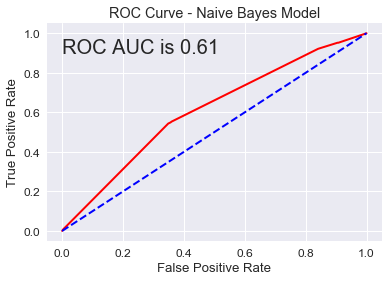

In [78]:
# draw ROC curve
fpr, tpr, thresholds = roc_curve(y,bayes.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Model')
plt.text(0,0.9,'\nROC AUC is '+str(round(roc_auc_score(y,bayes.predict_proba(x)[:,1]),2)),fontsize=20)
plt.show()

In [79]:
# calculate AUC of ROC curve using the following formula
roc_auc_score(y,bayes.predict_proba(x)[:,1])
# same result as logit

0.6086717850287908

In [80]:
# calculate AUC of ROC using cross validation design
scores2 = cross_val_score(bayes, x, y, cv=10, scoring='roc_auc')
print(scores2)
# all scores below are same as logit except minor difference in one 

[0.59384434 0.63125    0.66144231 0.63391827 0.59552885 0.55879808
 0.55973558 0.70504808 0.58612981 0.55572115]


In [81]:
# mean of 10 evaluation scores above
scores2.mean()

0.6081416455007257

In [82]:
# standard deviation of 10 evaluation scores above
scores2.std()

0.04669486831176291

In [83]:
# coefficients of lbayes model
result2=bayes.fit(x,y)
result2.coef_
# bayes and logit coefficients are very different in terms of absolute values and positive / negative signs

array([[-3.95699637, -0.86141876, -2.47539183]])

In [84]:
# TA Jessica has helped me with the code. 

In [85]:
# the code above uses cross_val_score() to automatically do 10-fold cross validation design
# the code below uses KFold() to manually set up the 10-fold cross validation design
# it also applies the model to predict a set of data 

In [86]:
RANDOM_SEED = 1
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression()]
N_FOLDS = 10
cv_results = np.zeros((N_FOLDS, len(names)))
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
    index_for_fold += 1


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Sc

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [87]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())   


----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.611060
Logistic_Regression    0.611733
dtype: float64


In [88]:
# because Logistic Regression and Naive Bayes Classification provide the same result
# we only need to apply one test on the following dataset to predict the response variable
# so we use Logistic Regression

In [89]:
my_default = np.array([1, 1, 1, 1, 0, 0, 0, 0], np.int32)
my_housing = np.array([1, 1, 0, 0, 1, 1, 0, 0], np.int32)
my_loan = np.array([1, 0, 1, 0, 1, 0, 1, 0], np.int32)
my_X_test = np.vstack([my_default, my_housing, my_loan]).T
clf = LogisticRegression()
X_train = model_data[:, 0:model_data.shape[1]-1]
y_train = model_data[:, model_data.shape[1]-1]
clf.fit(X_train, y_train)
y_my_test_predict = clf.predict_proba(my_X_test)
my_targeting_df = pd.DataFrame(np.hstack([my_X_test, y_my_test_predict]))
my_targeting_df.columns = ['default', 'housing', 'loan', 
                           'predict_NO', 'predict_YES']
print('\n\nLogistic regression model predictions for test cases:')
print(my_targeting_df) 



Logistic regression model predictions for test cases:
   default  housing  loan  predict_NO  predict_YES
0      1.0      1.0   1.0    0.945729     0.054271
1      1.0      1.0   0.0    0.892349     0.107651
2      1.0      0.0   1.0    0.900786     0.099214
3      1.0      0.0   0.0    0.811988     0.188012
4      0.0      1.0   1.0    0.953277     0.046723
5      0.0      1.0   0.0    0.906588     0.093412
6      0.0      0.0   1.0    0.914016     0.085984
7      0.0      0.0   0.0    0.834890     0.165110


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
# Thank you for viewing my code! 